In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:03<00:00, 24.5MB/s]
100% 60.3M/60.3M [00:03<00:00, 16.9MB/s]


In [4]:
data="/content/fer2013.zip"
from zipfile import ZipFile

with ZipFile(data,"r") as zip:
  zip.extractall()

In [5]:
train_paths=[]
train_labels=[]
train_dir='/content/train/'
from sklearn.utils import shuffle

import os
for label in sorted(os.listdir(train_dir)):
  for image in os.listdir(os.path.join(train_dir,label)):
    train_paths.append(os.path.join(train_dir,label,image))
    train_labels.append(label)
train_paths, train_labels = shuffle(train_paths, train_labels)


In [6]:
len(train_paths)

28709

In [7]:


len(train_labels)

28709

In [8]:
test_paths=[]
test_labels=[]
test_dir='/content/test/'

import os
for label in sorted(os.listdir(test_dir)):
  for image in os.listdir(os.path.join(test_dir,label)):
    test_paths.append(os.path.join(test_dir,label,image))
    test_labels.append(label)
test_paths, test_labels = shuffle(test_paths, test_labels)


<ipython-input-9-02792303d3d0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


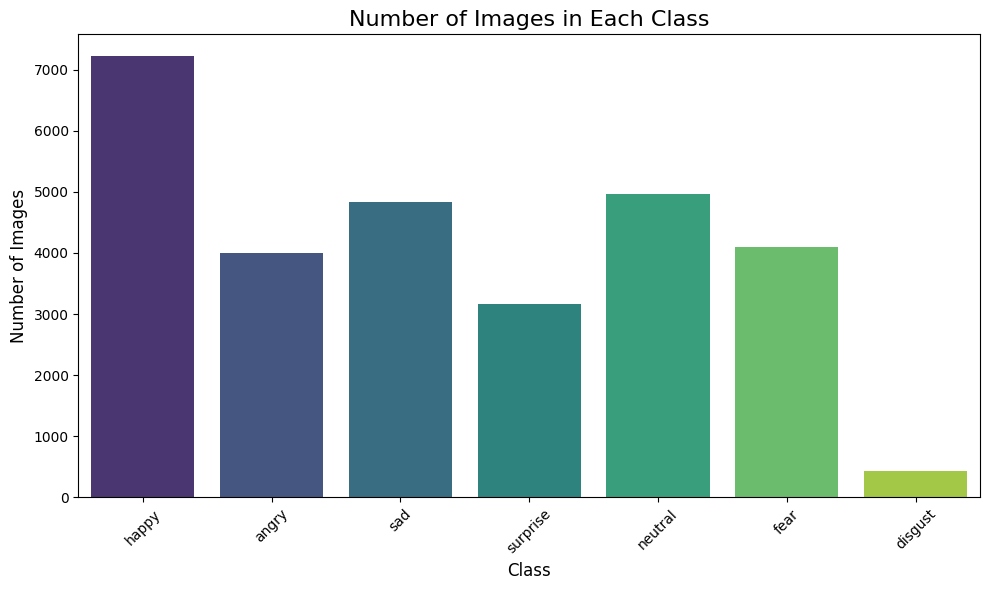

dict_values([7215, 3995, 4830, 3171, 4965, 4097, 436])


In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory where the images are stored
image_dir = '/content/train'  # Replace with the actual path to your image directory

# Count the number of images in each class
class_counts = {}
for class_name in os.listdir(image_dir):
    class_path = os.path.join(image_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it is a directory
        class_counts[class_name] = len(os.listdir(class_path))

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Number of Images in Each Class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(class_counts.values())

<ipython-input-10-30db5c481bf6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


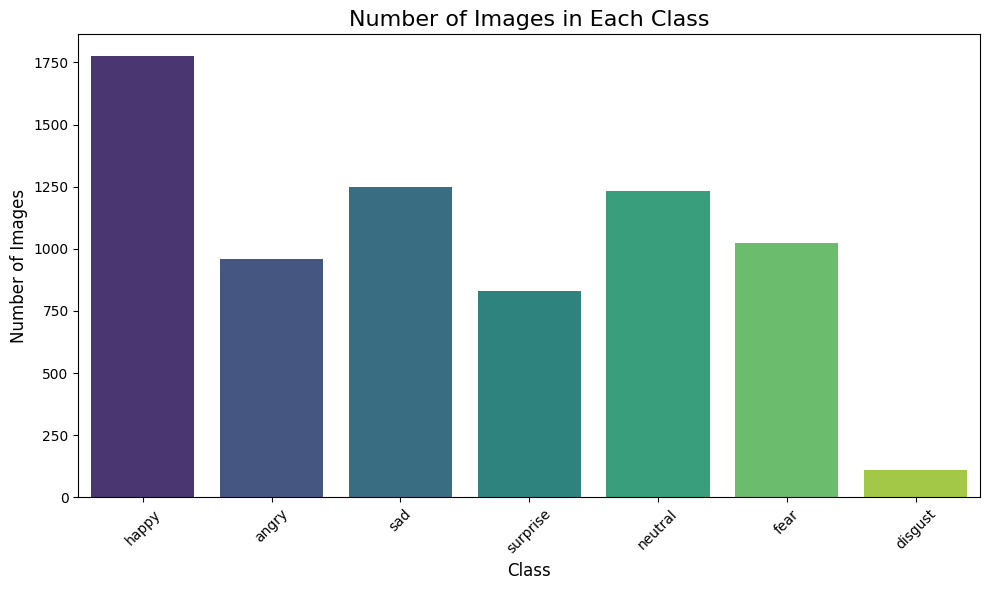

dict_values([1774, 958, 1247, 831, 1233, 1024, 111])


In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory where the images are stored
test_dir = '/content/test'  # Replace with the actual path to your image directory

# Count the number of images in each class
class_counts = {}
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it is a directory
        class_counts[class_name] = len(os.listdir(class_path))

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Number of Images in Each Class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(class_counts.values())

In [11]:
len(test_paths)

7178

In [12]:
len(test_labels)

7178

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from PIL import Image,ImageEnhance
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout

**Visulise the image**

[126, 20463, 7698, 27583, 9720, 461, 20966, 27748, 21167, 22772]


<Figure size 1000x1000 with 0 Axes>

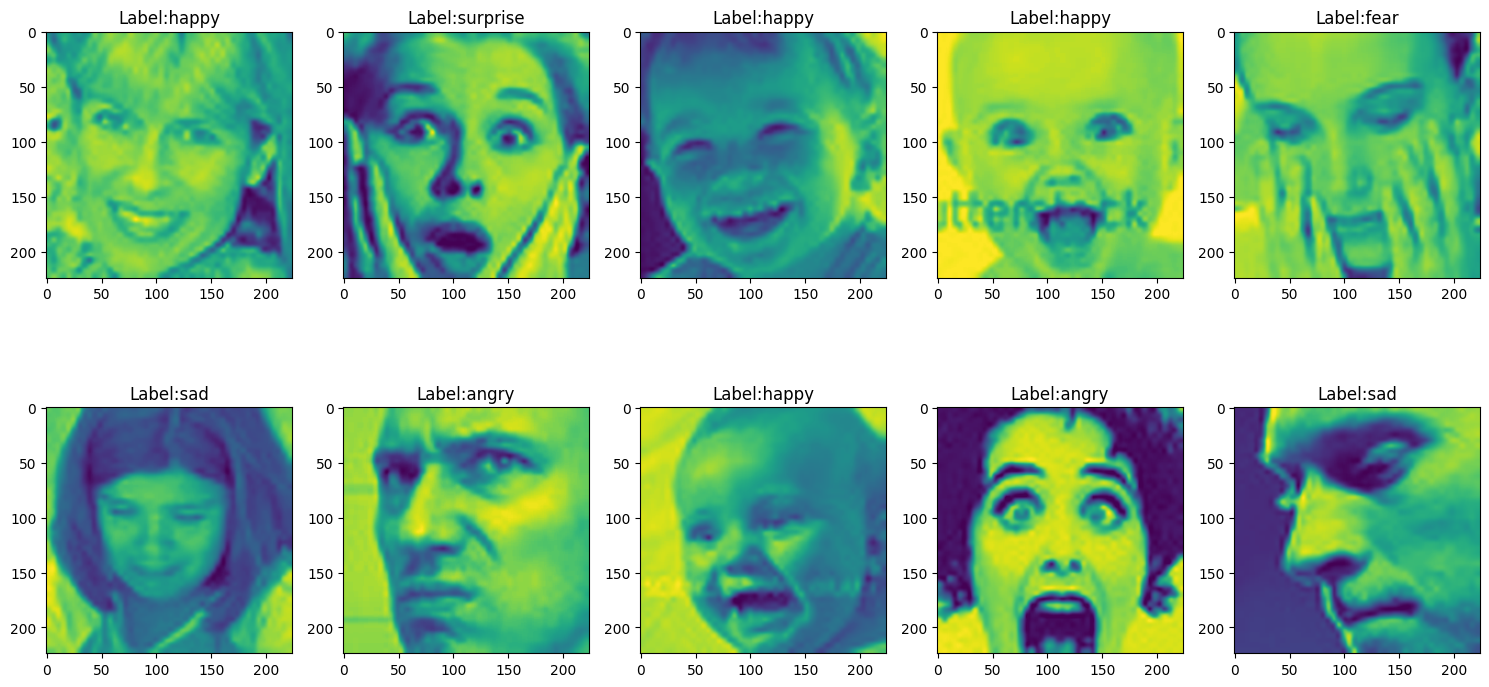

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))


import random
random_indices=random.sample(range(len(train_paths)),10)
print(random_indices)
from PIL import Image

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()


for i,idex in enumerate(random_indices):
  # Load image
    img_path = train_paths[idex]
    img = Image.open(img_path)
    img = img.resize((224, 224))

    axes[i].imshow(img)
    axes[i].set_title(f"Label:{train_labels[idex]}")
plt.tight_layout()
plt.show()

In [15]:
print(train_paths[:10])  # Check the first 10 image paths


['/content/train/happy/Training_24109050.jpg', '/content/train/angry/Training_62569186.jpg', '/content/train/surprise/Training_24659919.jpg', '/content/train/happy/Training_11500165.jpg', '/content/train/neutral/Training_83294694.jpg', '/content/train/happy/Training_13867633.jpg', '/content/train/happy/Training_52346640.jpg', '/content/train/happy/Training_42289026.jpg', '/content/train/sad/Training_72496252.jpg', '/content/train/sad/Training_48621797.jpg']


In [16]:
train_labels[-5:]

['surprise', 'happy', 'angry', 'fear', 'sad']

In [17]:
type(train_labels)

list

In [18]:
print(f"Number of train_paths: {len(train_paths)}")
print(f"Number of train_labels: {len(train_labels)}")


Number of train_paths: 28709
Number of train_labels: 28709


In [19]:
type(train_paths)

list

**Image Preprocesssing**

In [20]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image, ImageEnhance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import math
import os

# Assuming train_dir and other necessary variables are defined earlier
train_dir = "/content/train/"
# test_dir = "path_to_testing_data"
class_labels = sorted(os.listdir(train_dir))  # Assuming this is the list of class labels

# Augmentation function
def image_augment(image):
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8, 1.2))
    image = image.rotate(random.uniform(-15, 15))  # Random rotation
    return np.array(image, dtype="float32") / 255.0

# Load and augment images
def open_img(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(128, 128)).convert('RGB')  # Resize to 128x128
        img = image_augment(img)  # Apply augmentation
        images.append(img)  # Append augmented image
    return np.stack(images, axis=0)  # Stack images into a batch

# One-hot encoding of labels
def encoder(labels, unique_labels):
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    encoded_labels = np.array([label_map[label] for label in labels])
    one_hot_labels = np.zeros((encoded_labels.shape[0], len(unique_labels)))
    one_hot_labels[np.arange(encoded_labels.shape[0]), encoded_labels] = 1
    return one_hot_labels

# Data generator function
def datagen(paths, labels, unique_labels, batch_size=12):
    while True:
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            batch_images = open_img(batch_paths)
            batch_labels_one_hot = encoder(batch_labels, unique_labels)
            yield batch_images, batch_labels_one_hot



In [21]:
# Build the model using MobileNetV2 as base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = Sequential([
    base_model,
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Training Configuration
batch_size = 64
epochs = 20
unique_labels = class_labels  # Ensure this matches the labels in the dataset


steps_per_epoch = math.ceil(len(train_paths) / batch_size)
validation_steps = math.ceil(len(test_paths) / batch_size)

# Train the model
history = model.fit(
    datagen(train_paths, train_labels, unique_labels, batch_size=batch_size),
    validation_data=datagen(test_paths, test_labels, unique_labels, batch_size=batch_size),
    validation_steps=validation_steps,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch

)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 2, 2, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 2, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,631,911 (10.04 MB)

 Trainable params: 2,597,735 (9.91 MB)

 Non-trainable params: 34,176 (133.50 KB)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 151s 222ms/step - accuracy: 0.2715 - loss: 1.9396 - val_accuracy: 0.3624 - val_loss: 1.7639
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 69s 154ms/step - accuracy: 0.4707 - loss: 1.4034 - val_accuracy: 0.4207 - val_loss: 1.6661
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - accuracy: 0.5326 - loss: 1.2556 - val_accuracy: 0.4596 - val_loss: 1.5260
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 70s 155ms/step - accuracy: 0.5726 - loss: 1.1513 - val_accuracy: 0.5283 - val_loss: 1.2450
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 71s 158ms/step - accuracy: 0.6047 - loss: 1.0649 - val_accuracy: 0.5309 - val_loss: 1.3232
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 70s 156ms/step - accuracy: 0.6382 - loss: 0.9872 - val_accuracy: 0.5373 - val_loss: 1.3250
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 148ms/step - accuracy: 0.6636 - loss: 0.9141 - val_accuracy: 0.5737 - val_loss: 1.1868
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 68s 151ms/step - accuracy: 0.6936 - loss: 

**Vislauise the plot**

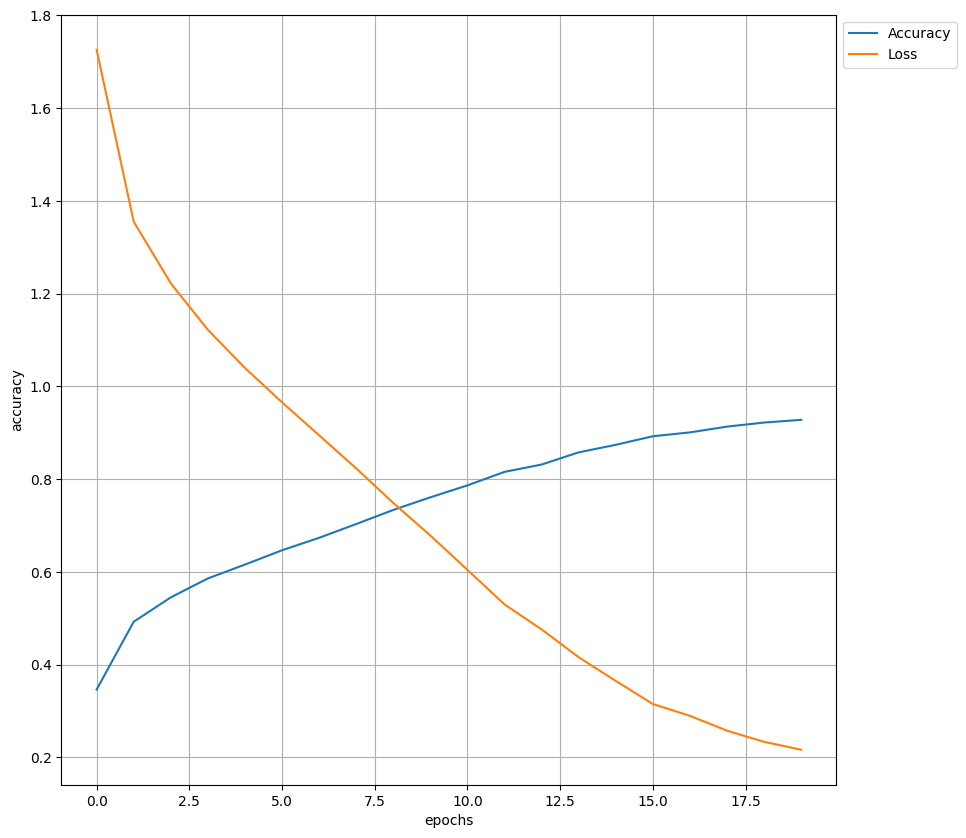

In [22]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
# plt.xticks([x for x in range(epochs)])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [23]:
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report

# Load the images and labels
test_images = open_img(test_paths)
test_encoder_labels = encoder(test_labels,unique_labels)

# Make predictions
test_prediction = model.predict(test_images)
test_prediction_labels = np.argmax(test_prediction, axis=1)  # Predicted labels in integer format

# Convert true labels to integer format
test_encoder_labels_int = np.argmax(test_encoder_labels, axis=1)

# Convert predicted labels to one-hot encoding
test_prediction_onehot = np.zeros_like(test_encoder_labels)  # Same shape as one-hot encoded labels
test_prediction_onehot[np.arange(len(test_prediction_labels)), test_prediction_labels] = 1

# Print the classification report using one-hot encoded labels
print(classification_report(test_encoder_labels, test_prediction_onehot))





225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       958
           1       0.88      0.25      0.39       111
           2       0.39      0.50      0.44      1024
           3       0.77      0.90      0.83      1774
           4       0.59      0.47      0.52      1233
           5       0.51      0.49      0.50      1247
           6       0.82      0.67      0.74       831

   micro avg       0.61      0.61      0.61      7178
   macro avg       0.64      0.54      0.56      7178
weighted avg       0.62      0.61      0.61      7178
 samples avg       0.61      0.61      0.61      7178



confusion matrix:
Confusion matrix:
[[ 503    0  165   78   74  125   13]
 [  42   28   13    8    2   17    1]
 [ 111    1  507   69   76  201   59]
 [  36    0   32 1598   44   43   21]
 [ 118    0  213  141  580  164   17]
 [ 111    2  223  116  177  608   10]
 [  30    1  137   58   28   23  554]]


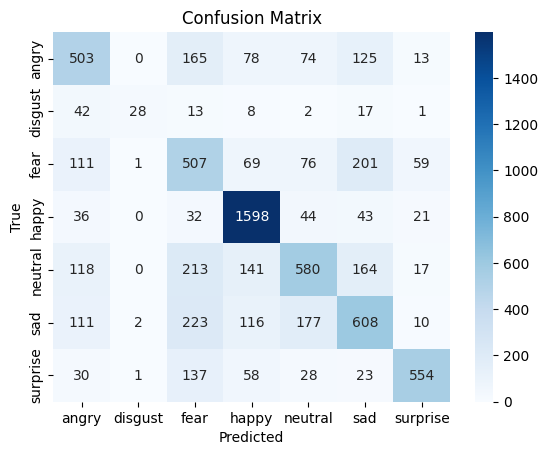

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix

print("confusion matrix:")

# Generate the confusion matrix
confu = confusion_matrix(test_encoder_labels_int, test_prediction_labels)

# Print confusion matrix
print("Confusion matrix:")
print(confu)

import seaborn as sns
# Plot confusion matrix
sns.heatmap(confu, annot=True, cmap="Blues", fmt="d", xticklabels=sorted(os.listdir(train_dir)), yticklabels=sorted(os.listdir(train_dir)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

IMAGE_SIZE=128
# Define class labels
class_labels = sorted(os.listdir(train_dir))
print(class_labels)

# Function to predict image
def predict_image(img_path, model):
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE, 3))
        img = img_to_array(img) / 255.0  # Convert to NumPy array and normalize
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Prediction
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted class
        confidence = np.max(prediction, axis=1)[0]  # Get the confidence score

        # Display the result
        result = f"Label: {class_labels[predicted_label]}"
        plt.imshow(load_img(img_path))  # Display the original image
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [26]:
model.save("model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


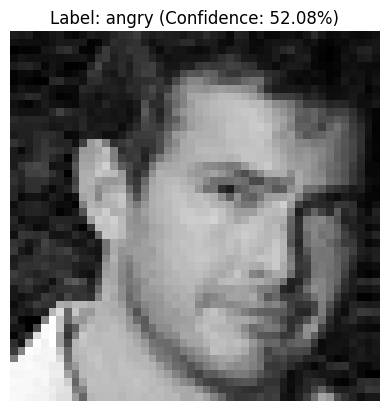

In [27]:
img_path="/content/train/angry/Training_10120469.jpg"
predict_image(img_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


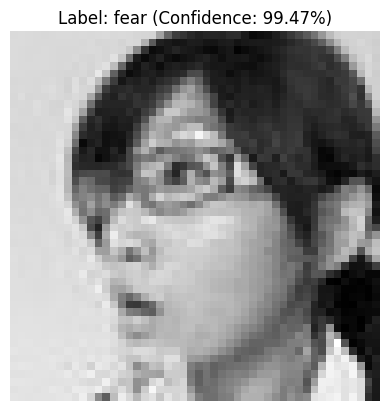

In [28]:
img_path="/content/train/fear/Training_10117992.jpg"
predict_image(img_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


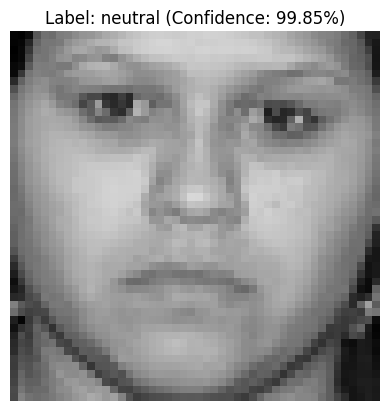

In [29]:
img_path="/content/train/neutral/Training_10031781.jpg"
predict_image(img_path,model)